# Data Reduction Methods
By: Adrian Garcia <br>
UCSC: AM-170B

## SVD
- The most common form of data reduction/processing because of its versatility and its ease of interpretation.
    - In its most simplest form: more singular values => more details!
- Applications:
    - Least squares linear regression
    - PCA (breaking down data to its "priciple components")
        - "priciple components" means breaking down data into its most dominant patterns/correlations.
    - Image reduction (useful for facial recognition algorithms, autonomous driving, etc.)

## Example

<class 'numpy.ndarray'>
(1279, 1920)


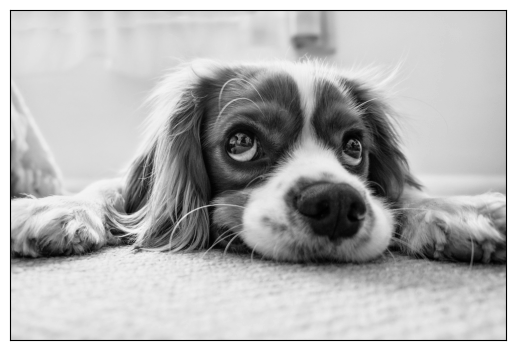

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
# Load data
data = np.loadtxt('dog_bw_data.dat')
print(type(data))
print(data.shape)
# Plot data
plt.imshow(data)
# Plot config
plt.set_cmap('gist_gray')
plt.xticks([])
plt.yticks([])
plt.show()

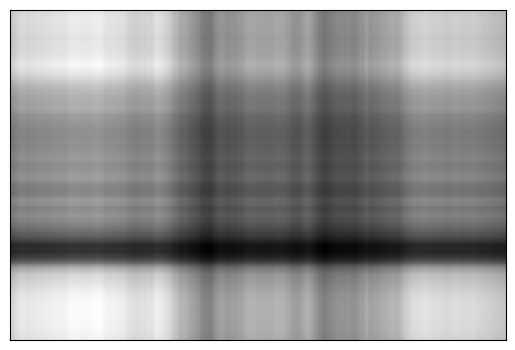

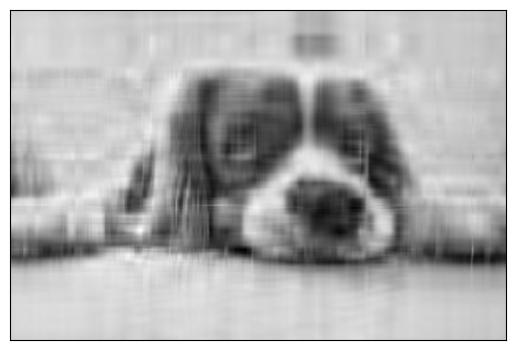

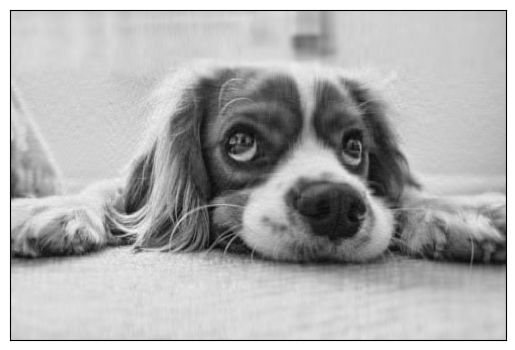

In [2]:
# Compute SVD
U, S, VT = np.linalg.svd(data)
# Use the singular values from S to construct a diag matrix S
S = np.diag(S)
j = 1
for r in (1, 10, 50):
    # Construct approxmate image
    Xapprox = np.matmul(U[:,:r], np.matmul(S[0:r,:r], VT[:r,:]))
    # Plot approxmate image
    plt.figure(j)
    j += 1
    plt.imshow(Xapprox)
    # Plot config
    plt.set_cmap('gist_gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

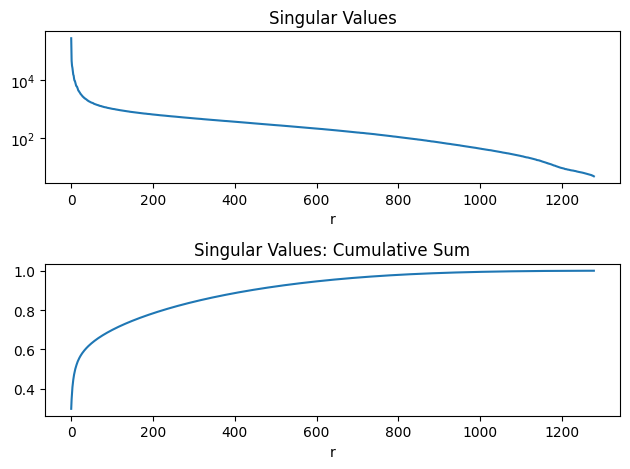

In [3]:
# The larger the singular value, the more info it brings to the table
plt.subplot(2, 1, 1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.xlabel('r')

# Fraction of characteristics captured at some r value
plt.subplot(2, 1, 2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.xlabel('r')
plt.tight_layout()
plt.show()

## PCA
- Fundamental data reduction tool in data science and machine learning where you want to uncover possible low dimensional patterns to build models.
- It essentially uncovers the direction(s) in which your data has the most variation.
    - "Principle component 1" is the direction with the greatest variance.
    - "Principle component 2" is the direction with the second greatest variance.
    - etc.
- Again, in its most simplest form: PCA compresses data into its most important characteristics.

## Example:
### Road Map:
Let our data be of the form:
$$X = \begin{bmatrix}-\quad x_{1} \quad - \\-\quad x_{2} \quad - \\-\quad \dots \quad - \\-\quad x_{n} \quad -\end{bmatrix}$$

#### Preprocessing
(1) Compute the mean of each row:
$$\bar{x}_{i} = \frac{1}{n}\sum_{j = 1}^{n} X_{ij}$$
(1.1) Construct the average matrix:
$$\bar{X} = \begin{bmatrix}\bar{x}_{1} \\ \bar{x}_{2} \\ \vdots \\ \bar{x}_{3}\end{bmatrix}\begin{bmatrix}1 & 1 & \dots & 1\end{bmatrix}$$
(2) Subtract mean from data:
$$B = X - \bar{X}$$

### Method Fork
#### Method 1
(3) Construct the covariance matrix:
$$C = B^{\top}B$$
(4) Compute the eigenvectors and eigenvalues of $C$ and construct eigenvector matrix $V$ and eigenvalue matrix $D$:
$$CV = VD$$
(5) Construct principle component matrix:
$$T = BV$$

#### Method 2
(3) Perform SVD decomposition on matrix $B$:
$$B = U\Sigma V^{\top}$$
(4) Construct principle component matrix:
$$T = BV = U\Sigma V^{\top}V = U\Sigma$$

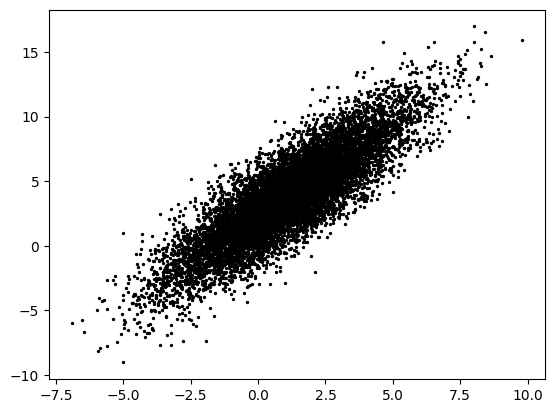

In [4]:
# Creating a center for the data
xCenter = 2
# Creating its principal axes
sig = np.array([2, 0.5])
# Rotating the data by pi/3
theta = np.pi / 3
# Creating rotation matrix
R = np.mat(np.array([[np.cos(theta), -np.sin(theta)], 
                     [np.sin(theta), np.cos(theta)]]))
# Creating 10,000 points
nPoints = 10000
# Creating artificial data
X = R*np.diag(sig)*np.random.normal(xCenter, 2, size=(2, nPoints))
plt.scatter([X[0,:]],[X[1,:]], s = 2, color = 'k')
plt.show()

In [5]:
x_bar = X.mean(axis = 1)
X_bar = x_bar*np.ones((1, nPoints))
B = X - X_bar
# Method 2: Compute SVD (normalized so that as we increase nPoints, the SVD doesnt change)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints))
# Use the singular values from S to construct a diag matrix S
S = np.diag(S)
T = U*S

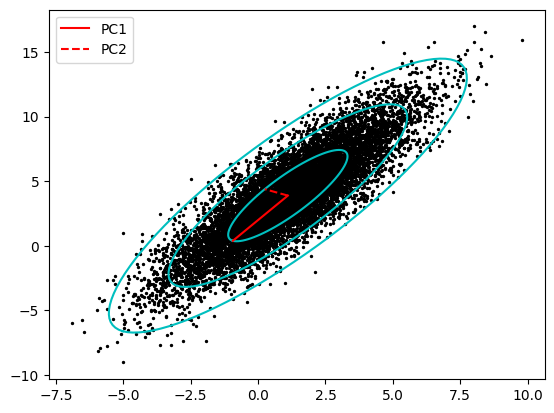

In [6]:
# Creating n-std confidence intervals
theta = np.linspace(0, 2*np.pi, 100)
Xstd = np.array(T*np.mat(np.array([[np.cos(theta)], 
                                   [np.sin(theta)]])))
T = np.array(T)
plt.figure(1)
plt.scatter([X[0,:]],[X[1,:]], s = 2, color = 'k')
plt.plot(x_bar[0,0] + Xstd[0,:], x_bar[1,0] + Xstd[1,:], '-c')
plt.plot(x_bar[0,0] + 2*Xstd[0,:], x_bar[1,0] + 2*Xstd[1,:], '-c')
plt.plot(x_bar[0,0] + 3*Xstd[0,:], x_bar[1,0] + 3*Xstd[1,:], '-c')
# Plot principle components 1 and 2
plt.plot([x_bar[0,0], x_bar[0,0] + T[0,0]], [x_bar[1,0], x_bar[1,0] + T[1,0]], '-r', label = 'PC1')
plt.plot([x_bar[0,0], x_bar[0,0] + T[0,1]], [x_bar[1,0], x_bar[1,0] + T[1,1]], '--r', label = 'PC2')
plt.legend()
plt.show()

## ICA and Its Applications
- Used to mainly in signal processing, ICA separates **independently sourced** mixed signals.
- It's documention can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html, but it's a fairly straightforward implementation.

## Example

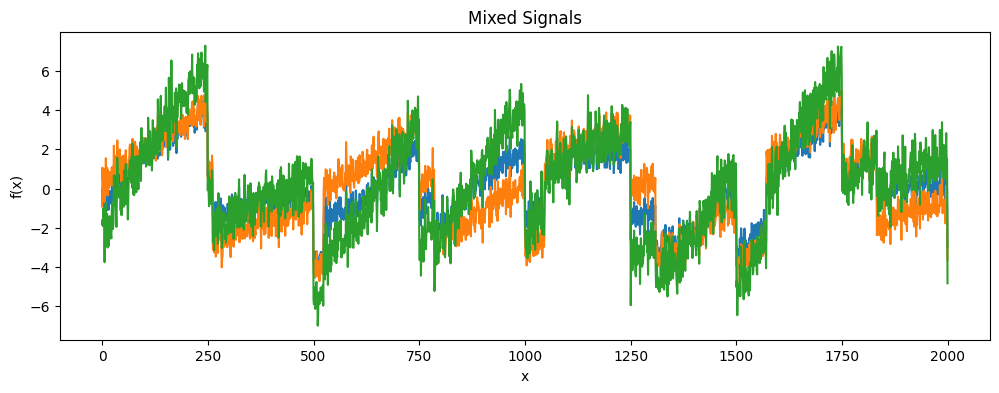

In [7]:
# Import packages
from scipy import signal
# Creating artificial data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)
s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal
S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise
S /= S.std(axis = 0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations
# Plot data
plt.figure(figsize = (12, 4))
plt.plot(X)
# Plot config
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Mixed Signals')
plt.show()

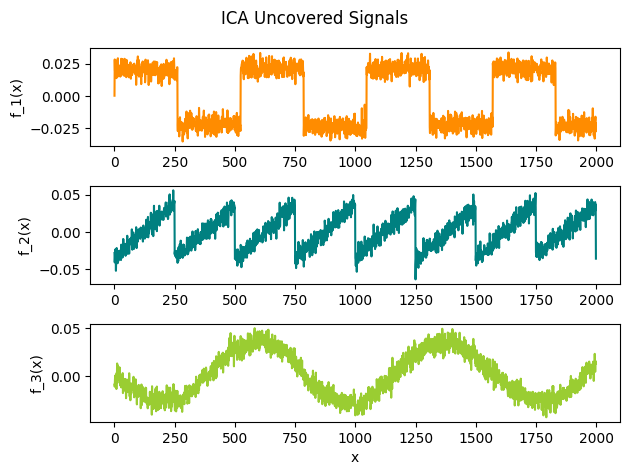

In [8]:
# Import packages
from sklearn.decomposition import FastICA
import warnings
warnings.filterwarnings('ignore')
# Create FastICA object
ICA = FastICA(n_components = 3, tol = 1e-12, max_iter = 1000)
# Implement ICA
ICA_signals = ICA.fit_transform(X)
# Plot data
colors = ['darkorange', 'teal', 'yellowgreen']
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.plot(ICA_signals[:,i], color = colors[i])
    # Plot config
    plt.ylabel(f'f_{i+1}(x)')
# Plot config cont.
plt.xlabel('x')
plt.suptitle('ICA Uncovered Signals')
plt.tight_layout()
plt.show()

## Homework Workshop